In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score

In [2]:
# Import csv file as df
df1 = pd.read_csv('weather_data.csv')
df2 = pd.read_csv('energy_data.csv')

# Used in Task 5
df4 = df2.copy()

# Task 1

In [3]:
#Examine the data
print(df1.isnull().sum())
print(df2.isnull().sum())
print(df1.shape)
print(df2.shape)

temperature             0
icon                    0
humidity                0
visibility              0
summary                 0
pressure                0
windSpeed               0
cloudCover           1470
time                    0
windBearing             0
precipIntensity         0
dewPoint                0
precipProbability       0
dtype: int64
Date & Time                        0
use [kW]                           0
gen [kW]                           0
Grid [kW]                          0
AC [kW]                            0
Furnace [kW]                       0
Cellar Lights [kW]                 0
Washer [kW]                        0
First Floor lights [kW]            0
Utility Rm + Basement Bath [kW]    0
Garage outlets [kW]                0
MBed + KBed outlets [kW]           0
Dryer + egauge [kW]                0
Panel GFI (central vac) [kW]       0
Home Office (R) [kW]               0
Dining room (R) [kW]               0
Microwave (R) [kW]                 0
Fridge (R) [kW]     

> Although there are some null entries we choose to ignore it for now since it might disappear after we combine some entries to get per day interval.

In [4]:
# Weather data: covnert unix time to datetime
df1['time'] = pd.to_datetime(df1['time'], unit='s')

# Weather data: take mean or mode of columns to get per day entries
group_time = df1.groupby(pd.Grouper(key='time', freq='D'))
agg_functions = {
    'temperature': 'mean',
    'humidity': 'mean',
    'pressure': 'mean',
    'windSpeed': 'mean',
    'cloudCover': 'mean',
    'visibility': 'mean',
    'windBearing': 'mean',
    'precipIntensity': 'mean',
    'dewPoint': 'mean',
    'precipProbability': 'mean',
    'icon': lambda x: x.value_counts().index[0],  # mode
    'summary': lambda x: x.value_counts().index[0]  # mode
}
df1 = group_time.agg(agg_functions)

df1.head()

,temperature,humidity,pressure,windSpeed,cloudCover,visibility,windBearing,precipIntensity,dewPoint,precipProbability,icon,summary
time,,,,,,,,,,,,
2014-01-01,20.110833,0.556667,1025.395000,6.820417,0.031304,9.970000,252.291667,0.000000,6.362083,0.000000,clear-night,Clear
2014-01-02,16.382500,0.784583,1023.465833,7.433750,0.354444,3.834583,53.458333,0.002004,10.737083,0.074583,snow,Light Snow
2014-01-03,6.256667,0.680833,1014.428750,12.828333,0.186364,4.509167,207.333333,0.002029,-2.337500,0.080000,snow,Light Snow
2014-01-04,2.711667,0.617083,1030.096250,5.248333,0.001667,9.822917,240.166667,0.000000,-8.352083,0.000000,clear-night,Clear
2014-01-05,17.654167,0.682083,1025.275000,3.417083,0.010952,9.134583,208.958333,0.000033,8.615000,0.000417,clear-night,Clear


In [5]:
# Energy data : sum up the energy usage to get per day entries
df2['Date & Time'] = df2['Date & Time'].astype('datetime64')
df2 = df2.resample('D', on='Date & Time').sum()

df2.head()

,use [kW],gen [kW],Grid [kW],AC [kW],Furnace [kW],Cellar Lights [kW],Washer [kW],First Floor lights [kW],Utility Rm + Basement Bath [kW],Garage outlets [kW],MBed + KBed outlets [kW],Dryer + egauge [kW],Panel GFI (central vac) [kW],Home Office (R) [kW],Dining room (R) [kW],Microwave (R) [kW],Fridge (R) [kW]
Date & Time,,,,,,,,,,,,,,,,,
2014-01-01,65.013592,0.0,65.013592,0.042977,8.814319,1.137579,0.750298,0.567603,0.178529,0.261094,0.254839,31.938131,0.350291,3.272944,0.200970,4.997037,4.639598
2014-01-02,32.305336,0.0,32.305336,0.047452,10.830045,0.600321,0.323182,0.506440,0.178024,0.282479,0.798316,5.423866,0.346679,3.475469,0.207041,1.534426,3.881399
2014-01-03,31.164468,0.0,31.164468,0.055865,12.417151,0.442453,0.004276,0.507426,0.176649,0.279159,0.746972,0.005554,0.344061,3.615520,0.201975,1.667553,3.671391
2014-01-04,45.287782,0.0,45.287782,0.048827,11.147332,0.674477,1.046294,0.515988,0.180056,0.344005,0.640721,19.994908,0.346872,3.700408,0.203913,1.029198,3.357907
2014-01-05,36.316643,0.0,36.316643,0.039831,9.301135,0.686189,0.235143,0.519449,0.178556,0.348489,0.584570,9.493912,0.346070,3.699178,0.197897,1.619991,4.373730


In [6]:
# Merge the two df to get the desired dataframe
df3 = pd.merge(df1, df2, left_index=True, right_index=True)

df3.head()

,temperature,humidity,pressure,windSpeed,cloudCover,visibility,windBearing,precipIntensity,dewPoint,precipProbability,...,First Floor lights [kW],Utility Rm + Basement Bath [kW],Garage outlets [kW],MBed + KBed outlets [kW],Dryer + egauge [kW],Panel GFI (central vac) [kW],Home Office (R) [kW],Dining room (R) [kW],Microwave (R) [kW],Fridge (R) [kW]
time,,,,,,,,,,,,,,,,,,,,,
2014-01-01,20.110833,0.556667,1025.395000,6.820417,0.031304,9.970000,252.291667,0.000000,6.362083,0.000000,...,0.567603,0.178529,0.261094,0.254839,31.938131,0.350291,3.272944,0.200970,4.997037,4.639598
2014-01-02,16.382500,0.784583,1023.465833,7.433750,0.354444,3.834583,53.458333,0.002004,10.737083,0.074583,...,0.506440,0.178024,0.282479,0.798316,5.423866,0.346679,3.475469,0.207041,1.534426,3.881399
2014-01-03,6.256667,0.680833,1014.428750,12.828333,0.186364,4.509167,207.333333,0.002029,-2.337500,0.080000,...,0.507426,0.176649,0.279159,0.746972,0.005554,0.344061,3.615520,0.201975,1.667553,3.671391
2014-01-04,2.711667,0.617083,1030.096250,5.248333,0.001667,9.822917,240.166667,0.000000,-8.352083,0.000000,...,0.515988,0.180056,0.344005,0.640721,19.994908,0.346872,3.700408,0.203913,1.029198,3.357907
2014-01-05,17.654167,0.682083,1025.275000,3.417083,0.010952,9.134583,208.958333,0.000033,8.615000,0.000417,...,0.519449,0.178556,0.348489,0.584570,9.493912,0.346070,3.699178,0.197897,1.619991,4.373730


In [7]:
#Check to see if there is null entries
df3.isnull().sum()

temperature                        0
humidity                           0
pressure                           0
windSpeed                          0
cloudCover                         0
visibility                         0
windBearing                        0
precipIntensity                    0
dewPoint                           0
precipProbability                  0
icon                               0
summary                            0
use [kW]                           0
gen [kW]                           0
Grid [kW]                          0
AC [kW]                            0
Furnace [kW]                       0
Cellar Lights [kW]                 0
Washer [kW]                        0
First Floor lights [kW]            0
Utility Rm + Basement Bath [kW]    0
Garage outlets [kW]                0
MBed + KBed outlets [kW]           0
Dryer + egauge [kW]                0
Panel GFI (central vac) [kW]       0
Home Office (R) [kW]               0
Dining room (R) [kW]               0
M

# Task 2

In [8]:
# Drop per devices energy usage
df3 = df3.iloc[:, :13]

# Convert categorical variable(icon and summary) to to numerical 
columnsToEncode = df3.select_dtypes(include=[object]).columns
df3 = pd.get_dummies(df3, columns=columnsToEncode)

#Split the data intro test and training(December will be test set)
test_set = df3.loc['2014-12-01':'2014-12-31']
train_set = df3.loc[~df3.index.isin(test_set.index)]

# Separate the predictor variables (weather data) from the target variable (use [kW])
train_x = train_set.drop(columns=['use [kW]'])
train_y = train_set['use [kW]']
test_x = test_set.drop(columns=['use [kW]'])
test_y = test_set['use [kW]']

# Check the size of train and test sets
print(train_x.shape)
print(test_x.shape)

(334, 23)
(31, 23)


# Task 3

In [9]:
# Set up linear Regression model
model = LinearRegression()
model.fit(train_x, train_y)

# Make prediction on the test set
y_pred = model.predict(test_x)

# Calculate root mean squared error 
mse = mean_squared_error(test_y, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Squared Error: ", rmse)
print("Actual values range from: " + str(test_y.min()) + " to " + str(test_y.max()))

Root Mean Squared Error:  10.090599356404168
Actual values range from: 19.38713611 to 44.563400003


>The model performed poorly. The root mean squared error of 10 suggests that the model will be off 10 units on averages. That is quite significant when considering our range. The reason that it did badly is probably because it has no data concerning the month of December.

In [10]:
# Parse data to be exported as CSV
df = pd.DataFrame({'predicted_value': y_pred, 'test_y': test_y})
result = pd.concat([df['test_y'], df['predicted_value']], axis=1)
result = result.reset_index()
result = result.drop(columns=['test_y'])
result = result.rename(columns={'time': 'date'})
result['date'] = result['date'].dt.strftime('%Y-%m-%d')

result.to_csv('cse351_hw2_zhu_felix_113450017_linear_regression.csv', index=False)
result.head()

,date,predicted_value
0,2014-12-01,30.176732
1,2014-12-02,30.120562
2,2014-12-03,11.840384
3,2014-12-04,30.212866
4,2014-12-05,24.040062


# Task 4

In [11]:
# copy df3
weather_data = df3.copy()

# Remove use [kW] because we are only interested in weather data
weather_data = weather_data.drop('use [kW]', axis=1)

# Create a new column for classification in the weather data
weather_data['high/low'] = weather_data['temperature'].apply(lambda x: 1 if x>=35 else 0)

#Split the data intro test and training
test_set = weather_data.loc['2014-12-01':'2014-12-31']
train_set = weather_data.loc[~df1.index.isin(test_set.index)]

# Separate the predictor variables (weather data) from the target variable ('high/low')
train_x = train_set.drop(columns=['high/low'])
train_y = train_set['high/low']
test_x = test_set.drop(columns=['high/low'])
test_y = test_set['high/low']

# Set up logisitic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(train_x, train_y)

# Make prediction on the test set
pred_y = model.predict(test_x)

# Calculate the F1 score
f1 = f1_score(test_y, pred_y)
print("F1 Score:", f1)

F1 Score: 0.8571428571428571


In [12]:
# Parse data to be exported as CSV
df = pd.DataFrame({'predicted_value': pred_y, 'test_y': test_y})
result = pd.concat([df['test_y'], df['predicted_value']], axis=1)
result = result.reset_index()
result = result.drop(columns=['test_y'])
result = result.rename(columns={'time': 'date'})
result['date'] = result['date'].dt.strftime('%Y-%m-%d')

result.to_csv('cse351_hw2_zhu_felix_113450017_logistic_regression.csv', index=False)
result.head()

,date,predicted_value
0,2014-12-01,1
1,2014-12-02,0
2,2014-12-03,1
3,2014-12-04,1
4,2014-12-05,0


# Task 5

In [13]:
# Group and average the df entires by their hours of the day and label Day or Night depending on the hour
df4['Date & Time'] = pd.to_datetime(df4['Date & Time'])
df4['Time of Day'] = df4['Date & Time'].apply(lambda x: 'Day' if x.hour >= 6 and x.hour < 19 else 'Night')
df4 = df4.groupby(['Time of Day', df4['Date & Time'].dt.hour]).mean()
df4 = df4.reset_index()
df4.head(24)

,Time of Day,Date & Time,use [kW],gen [kW],Grid [kW],AC [kW],Furnace [kW],Cellar Lights [kW],Washer [kW],First Floor lights [kW],Utility Rm + Basement Bath [kW],Garage outlets [kW],MBed + KBed outlets [kW],Dryer + egauge [kW],Panel GFI (central vac) [kW],Home Office (R) [kW],Dining room (R) [kW],Microwave (R) [kW],Fridge (R) [kW]
0,Day,6,0.602946,0.0,0.602946,0.017535,0.157099,0.009710,0.001685,0.006198,0.005376,0.005655,0.049054,0.045451,0.004772,0.054956,0.003096,0.020647,0.065865
1,Day,7,0.753801,0.0,0.753801,0.012207,0.150586,0.016707,0.003001,0.007659,0.005008,0.005688,0.042591,0.088411,0.005279,0.054417,0.003281,0.036711,0.082078
2,Day,8,0.721850,0.0,0.721850,0.013420,0.093438,0.016464,0.003764,0.007457,0.004794,0.008203,0.031783,0.112802,0.004998,0.054021,0.003429,0.018917,0.094679
3,Day,9,0.569598,0.0,0.569598,0.010111,0.051844,0.014057,0.004010,0.006612,0.004407,0.005930,0.030740,0.059280,0.005672,0.053828,0.003367,0.016061,0.079807
4,Day,10,0.584920,0.0,0.584920,0.029950,0.052863,0.013730,0.006201,0.007658,0.004657,0.005888,0.034379,0.094594,0.005597,0.053664,0.003311,0.008679,0.072158
5,Day,11,0.573402,0.0,0.573402,0.017995,0.048623,0.012657,0.007856,0.008986,0.004725,0.005940,0.031234,0.113317,0.004994,0.052932,0.003225,0.013108,0.069796
6,Day,12,0.611101,0.0,0.611101,0.038136,0.050392,0.011936,0.005829,0.009561,0.004770,0.006007,0.029625,0.143647,0.005108,0.053418,0.003332,0.019732,0.071675
7,Day,13,0.586932,0.0,0.586932,0.053388,0.053831,0.011098,0.004783,0.009199,0.004413,0.006073,0.030236,0.097827,0.004777,0.054081,0.003565,0.016995,0.070525
8,Day,14,0.622726,0.0,0.622726,0.061056,0.058605,0.011430,0.003609,0.009232,0.004400,0.005994,0.028032,0.131345,0.004780,0.054243,0.003622,0.016502,0.067679
9,Day,15,0.585824,0.0,0.585824,0.050243,0.053077,0.010184,0.006203,0.012377,0.004713,0.006164,0.034105,0.090458,0.005297,0.055658,0.003940,0.018186,0.065629


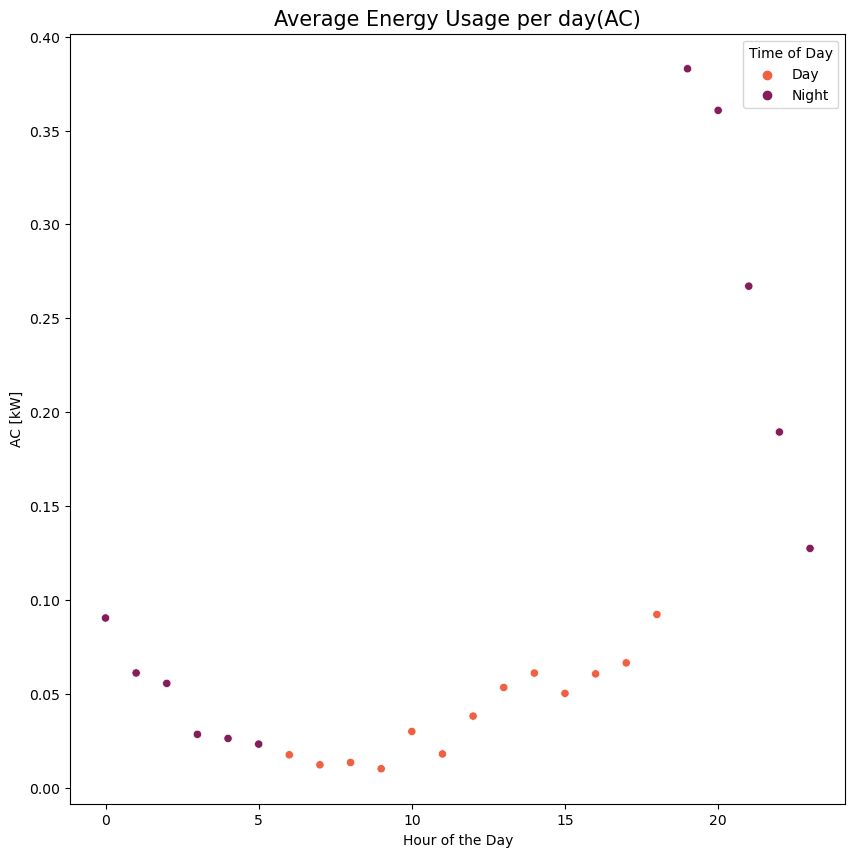

In [14]:
# Scatterplot of Average Energy Usage per day for device=AC
plt.figure(figsize=(10,10))
plt.title('Average Energy Usage per day(AC)', fontsize=15)
plt.xlabel('Hour of the Day')
plt.ylabel("AC [kW]")
a = sns.scatterplot(data=df4, x='Date & Time', y='AC [kW]', hue='Time of Day', palette='rocket_r')

> The plot shows that the energy usage of AC peaks at night after around 19:00 or 7PM.and dramatically drops as it approaches 23:00 or 11PM. This could be due to the fact that after a certain period of time the AC starts to consume less energy since the room has reached the temperature that it is set to. During day time we see that the energy usage of AC slowly ramps up. The data does make sense considering that people often work during the day and come home to relax at night. 

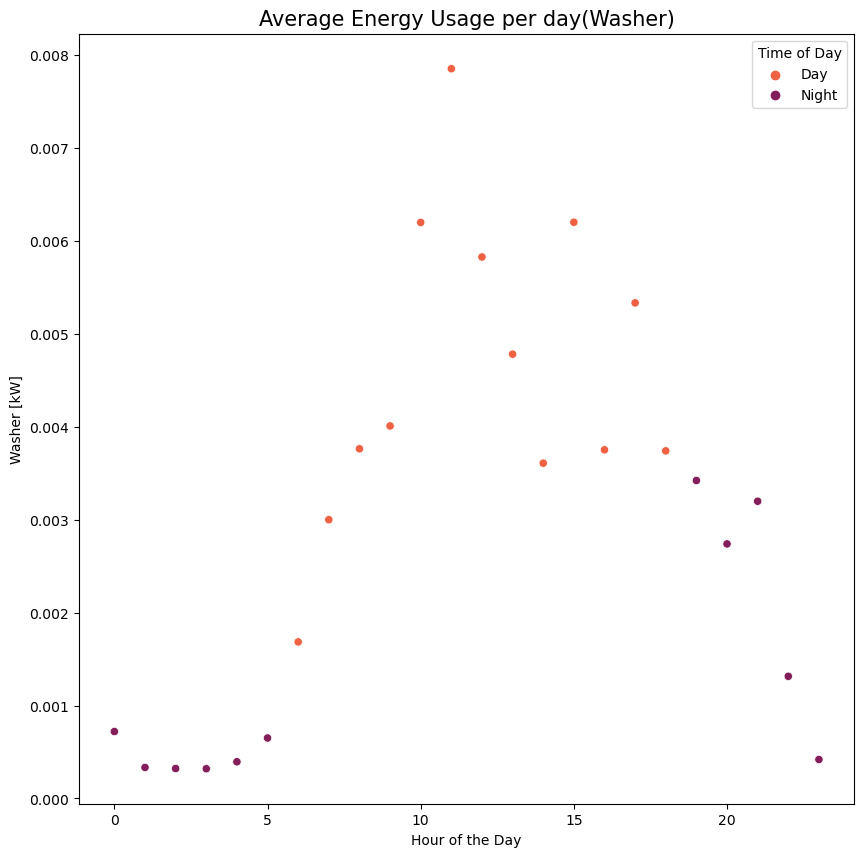

In [15]:
# Scatterplot of Average Energy Usage per day for device=Washer
plt.figure(figsize=(10,10))
plt.title('Average Energy Usage per day(Washer)', fontsize=15)
plt.xlabel('Hour of the Day')
plt.ylabel("Washer [kW]")
a = sns.scatterplot(data=df4, x='Date & Time', y='Washer [kW]', hue='Time of Day', palette='rocket_r')

>The data suggest that the washer are used both during day and night. Although mostly during the day perhaps along with other kinds of chores. We do see that from 0:00 or 12 AM to 5:00 or 5 AM there is barely any usage which makes sense, people are asleep at that time. The usage of washer is most likely aligned with humans actively around the house. Going by the plot it would suggest that the house is active from 7AM to 11PM which is a reasonable time interval.